In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import optuna
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.feature_selection import RFECV


D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split

all_df = pd.read_csv("../dataset/N315GC+CAI+Acimo.csv")
selected_columns=["locus tag","essential","DNA","protein sequence"]
Xs= all_df.drop(columns=selected_columns)
y=all_df["essential"]
Xs,Xs_test,y,y_test=train_test_split(Xs, y, test_size=0.2, random_state=42)
scorer = make_scorer(balanced_accuracy_score)

In [3]:
model_rf=RandomForestClassifier(n_estimators=261, max_depth=12,min_samples_split=8 )
ba_score=cross_val_score(model_rf, Xs, y ,cv=5,scoring=scorer).mean()
print(ba_score)

0.5385129636088827


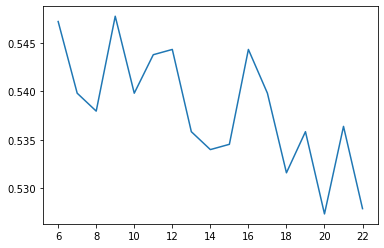

In [4]:
#remove high correlated features
score = []
for i in range(22,5,-1):
	X_mutual = SelectKBest(score_func=mutual_info_classif, k=i).fit_transform(Xs, y)
	once = cross_val_score(model_rf, X_mutual, y, cv=5,scoring=scorer)
	score.append(once.mean())
plt.plot(range(22,5,-1), score)
plt.show()              


In [5]:
# 10 features
X_mutual = SelectKBest(score_func=mutual_info_classif, k=10).fit_transform(Xs, y)
rfecv = RFECV(estimator=model_rf,  
            min_features_to_select=5, 
            step=1, 
            verbose = 1,
            n_jobs = 1,
            cv=3
              ).fit(X_mutual,y)
X_RFECV = rfecv.transform(X_mutual)
print("RFECVresult——————————————————————————————————————————————————")
print("valid : %d" % rfecv.n_features_)
print("ranking : %s" % list(rfecv.ranking_))

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
RFECVresult——————————————————————————————————————————————————
valid : 8
ranking : [1, 1, 1, 1, 1, 1, 1, 3, 2, 1]


In [6]:
all_feature_names = ["GC_Content","CAI","A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(Xs,y)
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
selected_feature_indices = rfecv.support_
selected_feature_names = cols_idxs[selected_feature_indices]
selected_features = [all_feature_names[i] for i in selected_feature_names]
print("Selected Features:")
print(selected_features)

Selected Features:
['GC_Content', 'CAI', 'A', 'H', 'I', 'L', 'K', 'Y']


In [8]:
selected_columns_rf=['GC_Content', 'CAI', 'A', 'H', 'I', 'L', 'K', 'Y']
model_rf.fit(Xs[selected_columns_rf],y)
Wrapper_score = cross_val_score(model_rf,Xs[selected_columns_rf],y,cv=5,scoring=scorer).mean()
print(Wrapper_score)

0.5416746380239316


In [9]:
Wrapper_score = cross_val_score(model_rf,Xs[selected_columns_rf],y,cv=5,scoring='accuracy').mean()
print(Wrapper_score)

0.8914772326570912


In [10]:
model_xgb=XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric='auc',booster='gbtree', reg_lambda=0.06549791643377749, alpha=0.034807661018972466, max_depth=8,colsample_bytree=0.7529261751602442, 
 subsample=0.5644783331957857)
ba_score=cross_val_score(model_xgb, Xs, y ,cv=5,scoring=scorer).mean()
print(ba_score)

0.567029160355677


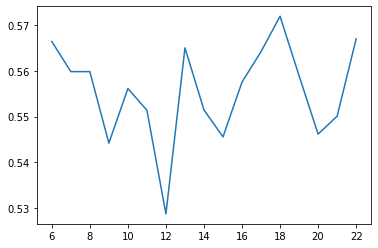

In [11]:
score = []
for i in range(22,5,-1):
	X_mutual = SelectKBest(score_func=mutual_info_classif, k=i).fit_transform(Xs, y)
	once = cross_val_score(model_xgb, X_mutual, y, cv=5,scoring=scorer)
	score.append(once.mean())
plt.plot(range(22,5,-1), score)
plt.show()              

In [12]:
# 18 features
X_mutual = SelectKBest(score_func=mutual_info_classif, k=18).fit_transform(Xs, y)
rfecv = RFECV(estimator=model_xgb,  
            min_features_to_select=5, 
            step=1, 
            verbose = 1,
            n_jobs = 1,
            cv=3
              ).fit(X_mutual,y)
X_RFECV = rfecv.transform(X_mutual)
print("RFECVresult——————————————————————————————————————————————————")
print("valid : %d" % rfecv.n_features_)
print("ranking : %s" % list(rfecv.ranking_))

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.


In [13]:
all_feature_names = ["GC_Content","CAI","A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
selector = SelectKBest(mutual_info_classif, k=18)
selector.fit(Xs,y)
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
selected_feature_indices = rfecv.support_
selected_feature_names = cols_idxs[selected_feature_indices]
selected_features = [all_feature_names[i] for i in selected_feature_names]
print("Selected Features:")
print(selected_features)

Selected Features:
['GC_Content', 'CAI', 'A', 'Q', 'G', 'H', 'I', 'L', 'P', 'S', 'T', 'W', 'Y', 'V']


In [14]:
selected_columns_xgb=['GC_Content', 'CAI', 'A', 'Q', 'G', 'H', 'I', 'L', 'P', 'S', 'T', 'W', 'Y', 'V']
model_xgb.fit(Xs[selected_columns_xgb],y)
Wrapper_score = cross_val_score(model_xgb,Xs[selected_columns_xgb],y,cv=5,scoring=scorer).mean()
print(Wrapper_score)

0.5577358000742187


In [15]:
Wrapper_score = cross_val_score(model_xgb,Xs[selected_columns_xgb],y,cv=5,scoring='accuracy').mean()
print(Wrapper_score)

0.8701638496438562


In [16]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(random_state=1, max_iter=500, hidden_layer_sizes= (100, 50, 25), alpha=0.18, activation= 'tanh')

In [17]:
ba_score = cross_val_score(model_mlp, Xs, y, cv=5,scoring=scorer)
print(ba_score.mean())

0.5339844204162307


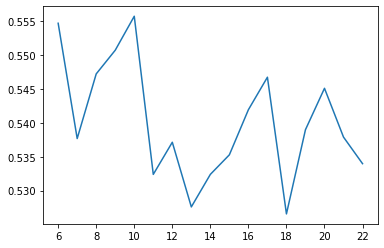

In [18]:
score = []
for i in range(22,5,-1):
	X_mutual = SelectKBest(score_func=mutual_info_classif, k=i).fit_transform(Xs, y)
	once = cross_val_score(model_mlp, X_mutual, y, cv=5,scoring=scorer)
	score.append(once.mean())
plt.plot(range(22,5,-1), score)
plt.show()

In [19]:
selector = SelectKBest(score_func=mutual_info_classif, k=10)
all_feature_names = ["GC_Content","CAI","A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
X_mutual=selector.fit_transform(Xs, y)
cols_idxs = selector.get_support(indices=True)
selected_features = [all_feature_names[i] for i in cols_idxs]
print(selected_features)

['GC_Content', 'CAI', 'A', 'R', 'H', 'I', 'L', 'K', 'F', 'Y']


In [20]:
selected_columns_mlp=['GC_Content', 'CAI', 'A', 'R', 'H', 'I', 'L', 'K', 'F', 'Y']
model_mlp.fit(Xs[selected_columns_mlp],y)
Wrapper_score = cross_val_score(model_mlp,Xs[selected_columns_mlp],y,cv=5,scoring=scorer).mean()
print(Wrapper_score)

0.5562950310014922


In [21]:
Wrapper_score = cross_val_score(model_mlp,Xs[selected_columns_mlp],y,cv=5,scoring='accuracy').mean()
print(Wrapper_score)

0.8938973647711512


In [23]:
from scipy.stats import ks_2samp

model_rf_prediction = model_rf.predict(Xs[selected_columns_rf])
model_xgb_prediction = model_xgb.predict(Xs[selected_columns_xgb])
model_mlp_prediction = model_mlp.predict(Xs[selected_columns_mlp])

statistic_xgb_rf, p_value_xgb_rf = ks_2samp(model_xgb_prediction, model_rf_prediction)
statistic_mlp_rf, p_value_mlp_rf = ks_2samp(model_mlp_prediction, model_rf_prediction)
statistic_xgb_mlp, p_value_xgb_mlp, = ks_2samp(model_xgb_prediction, model_mlp_prediction)

if p_value_xgb_rf < 0.05:
    print("Reject the null hypothesis: The distributions of xgboost and random forest are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of xgboost and random forest are the same.")

if p_value_mlp_rf < 0.05:
    print("Reject the null hypothesis: The distributions of MLP and random forest are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of MLP and random forest are the same.")
    
if p_value_xgb_mlp < 0.05:
    print("Reject the null hypothesis: The distributions of xgboost and MLP are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of xgboost and MLP are the same.")

Reject the null hypothesis: The distributions of xgboost and random forest are different.
Fail to reject the null hypothesis: The distributions of MLP and random forest are the same.
Reject the null hypothesis: The distributions of xgboost and MLP are different.


In [24]:
print(p_value_xgb_mlp,p_value_xgb_rf,p_value_mlp_rf)

3.5671195921026913e-07 1.2905718938839826e-05 0.9998045804566601


D:\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


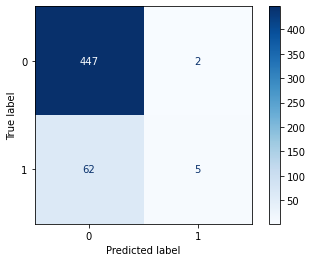

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
X_evl_test_rf = np.array(Xs_test[selected_columns_rf])
y_evl_test = np.array(y_test)
disp = ConfusionMatrixDisplay.from_estimator(model_rf,X_evl_test_rf,y_evl_test,cmap=plt.cm.Blues)

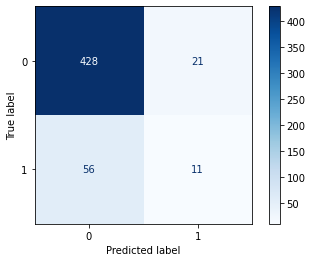

In [26]:
X_evl_test_xgb = np.array(Xs_test[selected_columns_xgb])

disp_xgb = ConfusionMatrixDisplay.from_estimator(model_xgb,X_evl_test_xgb,y_evl_test,cmap=plt.cm.Blues)

D:\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


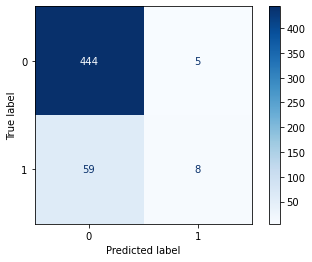

In [27]:
X_evl_test_mlp = np.array(Xs_test[selected_columns_mlp])

disp_mlp = ConfusionMatrixDisplay.from_estimator(model_mlp,X_evl_test_mlp,y_evl_test,cmap=plt.cm.Blues)

D:\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


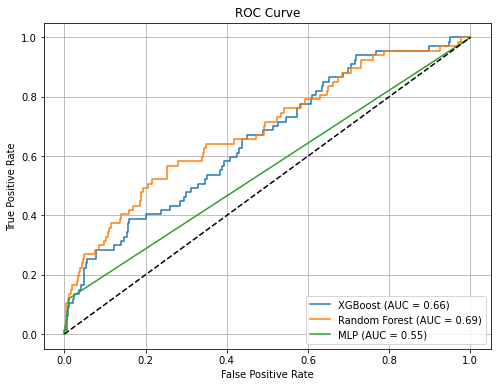

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_xgb = model_xgb.predict_proba(X_evl_test_xgb)[:, 1]  
y_pred_rf = model_rf.predict_proba(X_evl_test_rf)[:, 1]
y_pred_mlp = model_mlp.predict(X_evl_test_mlp)

# 计算 ROC 曲线的参数
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_evl_test, y_pred_xgb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_evl_test, y_pred_rf)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_evl_test, y_pred_mlp)

# 计算 AUC 值
auc_xgb = roc_auc_score(y_evl_test, y_pred_xgb)
auc_rf = roc_auc_score(y_evl_test, y_pred_rf)
auc_mlp = roc_auc_score(y_evl_test, y_pred_mlp)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % auc_xgb)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = %0.2f)' % auc_mlp)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()